<a href="https://colab.research.google.com/github/popogeee/100Day_ML/blob/master/Day_078_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
!nvidia-smi

Wed Jul 15 07:24:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    33W / 250W |   8291MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [70]:
from keras import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [71]:
def plot_loss_acc():
    val_loss = history.history["val_loss"]
    loss = history.history["loss"]
    plt.plot(val_loss, label="val_loss")
    plt.plot(loss, label="loss")
    plt.legend()
    plt.show()
    val_accuracy = history.history["val_accuracy"]
    accuracy = history.history["accuracy"]
    plt.plot(val_accuracy, label="val_accuracy")
    plt.plot(accuracy, label="accuracy")
    plt.legend()
    plt.show()

In [72]:
#取得Keras Dataset
(X_train, y_train), (X_test, y_test) =datasets.cifar10.load_data()
#將像素降為0-1範圍
X_train = (X_train/255).astype("float32")
X_test = (X_test/255).astype("float32")

In [73]:
def build_model(X_train):
    model = Sequential()
    model.add(Conv2D(256,kernel_size=(3,3), activation="relu", padding="same", input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(128,kernel_size=(3,3), activation="relu", padding="same"))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64,kernel_size=(3,3), activation="relu", padding="same"))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(256, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    #model.summary()
    #opt = optimizers.Adam()
    model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

10000/10000 [==============================] - 1s 93us/step
test_loss= 0.6627597623348236
test_acc= 0.7696999907493591


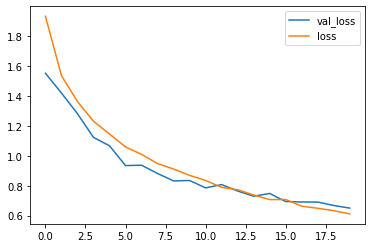

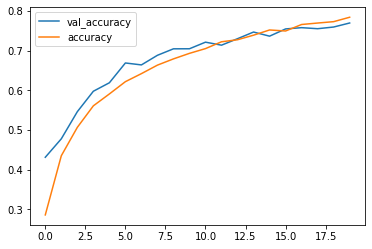

10000/10000 [==============================] - 1s 95us/step
test_loss= 0.700756318283081
test_acc= 0.755299985408783


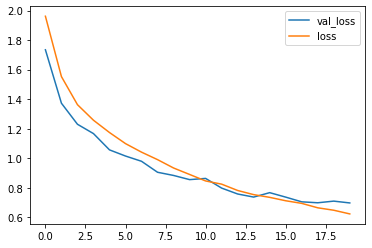

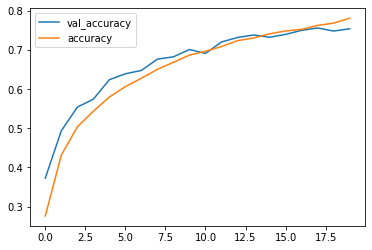

10000/10000 [==============================] - 1s 94us/step
test_loss= 0.6854772854804992
test_acc= 0.7631999850273132


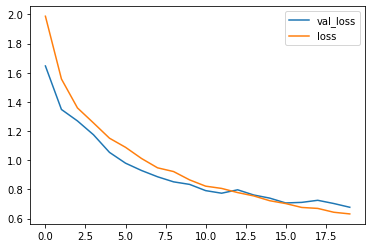

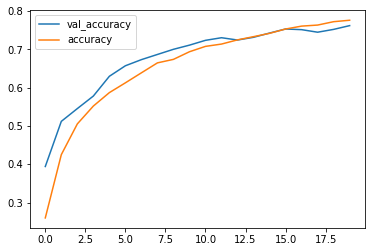

10000/10000 [==============================] - 1s 93us/step
test_loss= 0.6826028846740723
test_acc= 0.7610999941825867


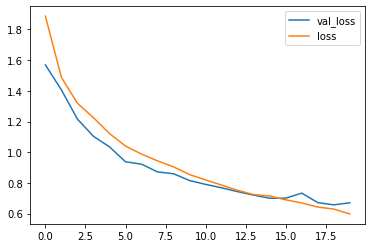

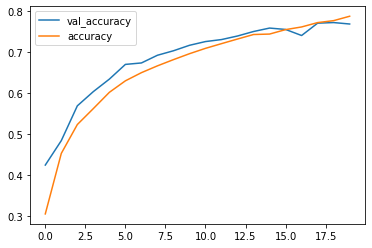

In [74]:
from sklearn.model_selection import KFold, StratifiedKFold
k=4
eval_score = []
skf = StratifiedKFold(n_splits=k)
for train_index, val_index in skf.split(np.zeros(X_train.shape[0]), y_train):
    X_train_data = X_train[train_index]
    X_val_data = X_train[val_index]
    y_train_data = y_train[train_index]
    y_val_data = y_train[val_index]

    model = build_model(X_train)
    history = model.fit(X_train_data, y_train_data, epochs=20, verbose=None, batch_size=512, validation_data=(X_val_data, y_val_data))
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("test_loss=", test_loss)
    print("test_acc=", test_acc)
    plot_loss_acc()
    eval_score.append(test_acc)
evaluation_score = np.average(eval_score)

In [75]:
evaluation_score

0.7623249888420105